In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
con=sqlite3.connect('database.sqlite') 

filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 limit 20000
""", con) 



def partition(x):
    if x > 3:
        return 1
    return 0

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative



/home/dtewani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [3]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(19354, 10)

In [4]:
##print (final_counts)
#print(final_counts)
labels_1000 = final['Score'] 
#labels_1000.shape


In [5]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'yourself', 'wouldn', 'won', 'wasn', "needn't", 'while', 'some', 'am', 'being', 'so', 'you', 'until', "couldn't", 'herself', 'y', 'but', 'very', 'now', 'our', 'couldn', 'any', 'under', 'had', 'themselves', 'when', 'this', 'just', 'o', 'i', 'hasn', 'down', "didn't", 'does', 'the', 'didn', 'mightn', 'it', 'in', 'where', "won't", 'no', 'too', 'whom', 'we', "you're", 'again', 'do', 'about', 'then', 'against', 'did', "that'll", "hasn't", 'weren', 'same', "hadn't", 'hadn', "you'd", 'was', "mightn't", 'mustn', 'your', 'of', 'or', 'isn', 'on', 'other', 'having', 'below', 'them', 'their', 'why', 'him', 'its', 'between', 'because', 'haven', 'ourselves', 'both', "wouldn't", "she's", 're', "aren't", 'she', 'those', 't', 'after', "weren't", 'with', 'ours', 'they', 'nor', "should've", 'most', 'not', 'doesn', 'over', 'through', 'these', 'can', 'which', "shan't", 'if', 'm', 'up', 's', 'aren', 'myself', 'an', 'that', 'd', 'above', 'for', 've', 'ma', 'such', 'each', "mustn't", 'ain', "it's", 'out', 'sh

In [6]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 2: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 1:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [8]:
final['clean']=final_string

/home/dtewani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final['clean'].values )
##X = final_counts.todense()
dense_data_bow = final_counts.todense()
#dense_data_bow=final_counts

In [10]:
dense_data_bow.shape

(19354, 16593)

In [11]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
#names = ['x', 'y', 'class']
##names = ['x']
# loading training data
df = labels_1000
#print(df.head())
#df.head()
# create design matrix X and target vector y
y = np.array(df) # end index is exclusive
#df.reshape((999,1))
#y = np.array(df['class']) # showing you two ways of indexing a pandas df
X=dense_data_bow

In [12]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(19354,)

In [13]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree' ,n_jobs=4)

    # fitting the model on crossvalidation train
    knn.fit(X_1, y_1)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 100%

CV accuracy for k = 3 is 89%

CV accuracy for k = 5 is 88%

CV accuracy for k = 7 is 86%

CV accuracy for k = 9 is 86%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 84%

CV accuracy for k = 17 is 84%

CV accuracy for k = 19 is 84%

CV accuracy for k = 21 is 84%

CV accuracy for k = 23 is 84%

CV accuracy for k = 25 is 84%

CV accuracy for k = 27 is 84%

CV accuracy for k = 29 is 84%

****Test accuracy for k = 1 is 78%



The optimal number of neighbors is 14.


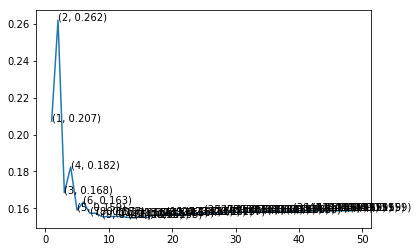

the misclassification error for each k value is :  [0.207 0.262 0.168 0.182 0.159 0.163 0.157 0.157 0.155 0.156 0.156 0.155
 0.155 0.156 0.155 0.156 0.156 0.157 0.157 0.157 0.157 0.157 0.158 0.157
 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.159
 0.159 0.159 0.159 0.159 0.159 0.159 0.159 0.159 0.159]


In [14]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 10 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree' ,n_jobs=5)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [25]:
    to_array()
dense_matrix    sparse.matrix.toarray()

In [15]:
optimal_k=14

In [16]:
from time import time

/home/dtewani/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


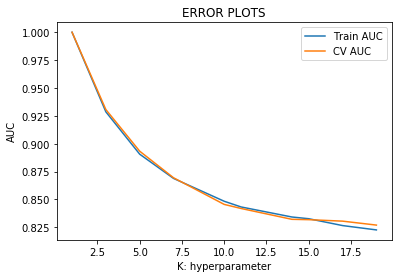

CPU times: user 1d 2h 14min 34s, sys: 19 s, total: 1d 2h 14min 53s
Wall time: 5h 24min 9s


In [13]:
%%time
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
K = [1,3,5,7,10,11,14,15,17,19]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree' ,n_jobs=5)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show() 

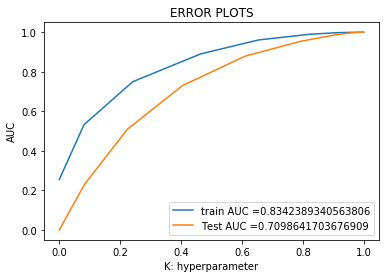

Train confusion matrix
[[  181  1935]
 [   24 11407]]
Test confusion matrix
[[  36  863]
 [  13 4895]]
CPU times: user 5h 40min 24s, sys: 4.45 s, total: 5h 40min 28s
Wall time: 1h 25min 51s


In [16]:
%%time
from sklearn.metrics import roc_curve, auc

#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree' ,n_jobs=4)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [18]:
%%time
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,n_jobs=4)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=14, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 14 is 84.914758%
CPU times: user 52min 49s, sys: 1.57 s, total: 52min 50s
Wall time: 13min 31s


In [27]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['clean'].values)

In [28]:
final_tf_idf.get_shape()

(46072, 707462)

In [29]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
#names = ['x', 'y', 'class']
##names = ['x']
# loading training data
df = labels_1000
#print(df.head())
#df.head()
# create design matrix X and target vector y
y = np.array(df) # end index is exclusive
#y=df
#df.reshape((999,1))
#y = np.array(df['class']) # showing you two ways of indexing a pandas df
X=final_tf_idf 

In [30]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(46072,)

In [31]:
%%time
for i in range(1,20,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=5)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 80%

CV accuracy for k = 3 is 84%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 80%


nee [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
scores :  [0.79394583 0.81562168 0.79372674 0.80808081 0.80223285 0.80223285
 0.80595428 0.81711855 0.80542265 0.80648591 0.81446039 0.81392876]
knn :  KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=1, p=2,
           weights='uniform')
scores :  [0.84439724 0.84962806 0.83997873 0.84529506 0.83572568 0.8394471
 0.84157363 0.84157363 0.84688995 0.84635832 0.84795322 0.8559277 ]
knn :  KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=3, p=2,
           weights='uniform')
scores :  [0.85130112 0.85175345 0.85114301 0.85539607 0.84795322 0.84635832
 0.8559277  0.8559277  0.84848485 0.85007974 0.84848485 0.85752259]
knn :  KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=5, p=2,
           weights='

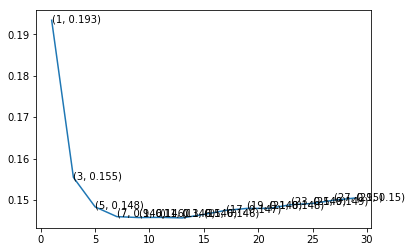

the misclassification error for each k value is :  [0.193 0.155 0.148 0.146 0.146 0.146 0.146 0.146 0.147 0.148 0.148 0.149
 0.149 0.15  0.15 ]


13

In [32]:
%%time
# creating odd list of K for KNN
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
print("nee",neighbors)
# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute', n_jobs=5)
    scores = cross_val_score(knn, X_tr, y_tr, cv=12, scoring='accuracy')
    cv_scores.append(scores.mean())
#    print('scores : ',scores)
#    print('knn : ',knn)

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print(MSE)
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))
optimal_k

/home/dtewani/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


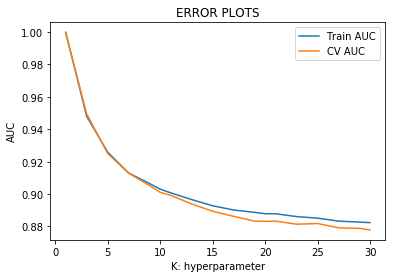

In [33]:
%%time
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
#K = [1,3,5,7,9,10,11,13,15,17,19,20]
K = [1,3,5,7,10,11,14,15,17,19]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=5)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show() 

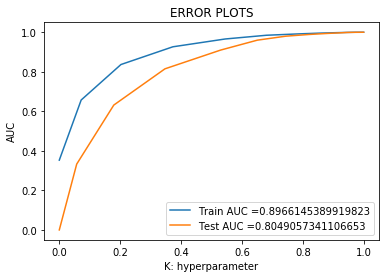

Train confusion matrix
[[ 1139  4163]
 [  226 26722]]
Test confusion matrix
[[  413  1877]
 [  131 11401]]


In [34]:
%%time
from sklearn.metrics import roc_curve, auc

#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=6)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [35]:
%%time
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 13 is 85.472435%


In [36]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [37]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [39]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
 
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
 

In [40]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)  

In [41]:
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50)
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

#sent_vec    

In [42]:
X = sent_vectors #final_w2v_count
y = final['Score']

In [43]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(46072,)

In [44]:
%%time
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 80%

CV accuracy for k = 3 is 83%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 81%



The optimal number of neighbors is 18.


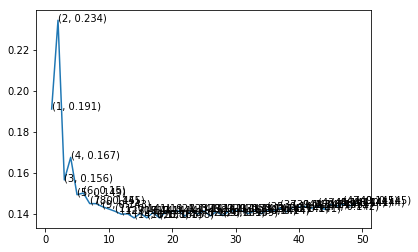

the misclassification error for each k value is :  [0.191 0.234 0.156 0.167 0.149 0.15  0.145 0.145 0.143 0.141 0.14  0.14
 0.138 0.14  0.138 0.14  0.138 0.141 0.141 0.139 0.141 0.14  0.141 0.139
 0.141 0.139 0.141 0.141 0.14  0.141 0.14  0.142 0.141 0.143 0.141 0.143
 0.143 0.143 0.144 0.142 0.144 0.144 0.145 0.144 0.145]


In [45]:
# creating odd list of K for KNN
%%time
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=6)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

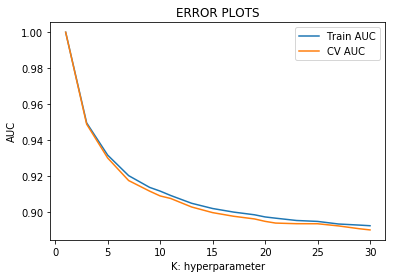

In [47]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
#K = [1,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30]
K = [1,3,5,7,10,11,14,15,17,19]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=6)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()  

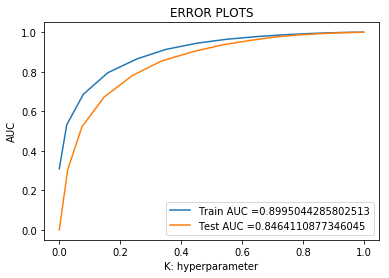

Train confusion matrix
[[ 1843  3459]
 [  582 26366]]
Test confusion matrix
[[  681  1609]
 [  289 11243]]


In [48]:
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
%%time
neigh = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=6)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))


In [49]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 18 is 86.268268%


In [ ]:
AVG word to VEC

In [182]:
from tqdm import tqdm
import numpy as np

In [ ]:
i=0
list_of_sentance_train=[]
for sentance in X_1:
    list_of_sentance_train.append(final['clean'].values.split())

In [193]:
# average Word2Vec
# compute average word2vec for each review.
%%time
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

9564
50


In [194]:
X_tr= sent_vectors

In [50]:
X_tr

[array([-0.1064815 ,  0.16436047, -0.04410253, -0.52584711,  0.61379579,
         0.46400374, -0.25421173, -0.17284562, -0.46591133,  0.26956193,
        -0.3380119 ,  0.6572187 , -0.70848532,  0.07656166,  0.65114631,
         0.35724931,  0.28564553,  0.0094913 ,  0.53350413, -0.1139092 ,
         0.25345553, -0.13743969, -0.24763091, -0.20698304,  1.01247773,
         0.22249513, -0.16495885,  0.49606271,  0.38089516,  0.66736106,
        -0.3804235 , -0.30532621,  0.18944063, -0.36938892,  0.63650187,
        -0.50262435,  0.42056008,  0.23923857, -0.56685438,  0.53420019,
        -0.28980781, -0.35080919, -0.3395608 ,  0.24447582,  0.12563217,
         0.34226165,  0.02254383,  0.0585171 ,  0.07065102,  1.16519133]),
 array([-6.04885949e-02, -4.84160271e-01,  3.00575500e-01, -5.41077161e-01,
         2.27967610e-02, -1.88061849e-01, -2.97439243e-01, -2.38023545e-01,
        -5.31359267e-01, -6.83242582e-02, -1.40929261e-01,  3.08399361e-01,
        -3.60908474e-01, -1.30957539e-01

In [196]:
%%time
for i in range(1,20,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 78%

CV accuracy for k = 3 is 81%

CV accuracy for k = 5 is 82%

CV accuracy for k = 7 is 83%

CV accuracy for k = 9 is 83%

CV accuracy for k = 11 is 83%

CV accuracy for k = 13 is 83%

CV accuracy for k = 15 is 83%

CV accuracy for k = 17 is 83%

CV accuracy for k = 19 is 83%

CV accuracy for k = 21 is 83%

CV accuracy for k = 23 is 82%

CV accuracy for k = 25 is 82%

CV accuracy for k = 27 is 82%

CV accuracy for k = 29 is 82%

****Test accuracy for k = 1 is 79%



The optimal number of neighbors is 9.


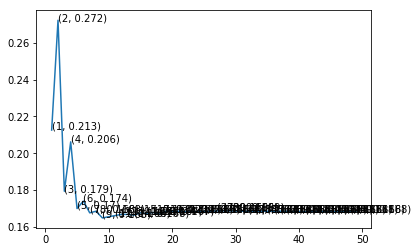

the misclassification error for each k value is :  [0.213 0.272 0.179 0.206 0.17  0.174 0.168 0.168 0.165 0.166 0.167 0.167
 0.166 0.168 0.167 0.168 0.167 0.168 0.168 0.168 0.168 0.168 0.168 0.168
 0.169 0.169 0.169 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168
 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168]


In [197]:
# creating odd list of K for KNN
%%time
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [ ]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
K = [1,3,7,5,10,15,17]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show() 

In [ ]:
from sklearn.metrics import roc_curve, auc

#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [ ]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))